# Code to read the pypi_meta_all data, clean and to create edgelist

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import tqdm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## Metadata 

This dataset is all the records from the meta data table without additional restrictions. The only requirement applied was that the version is released. There is an additional dataset that if further filtered for packages with license information and a github homepage. 

In [3]:
meta = pd.read_csv('/project/class/sds_sdad/oss_capstone2021-2022/clean_data_11132021/pypi_meta_all.csv') #read data
meta = meta.drop('Unnamed: 0', axis=1) #drop row name column
meta['dependency'] = meta['dependency'].apply(lambda x: 'none available' if x is np.NaN else x)
meta 

,name,version,author,author_email,license,home_page,dependency
0,cs.py3,20180805,Cameron Simpson,cs@cskk.id.au,NaN,https://bitbucket.org/cameron_simpson/css/comm...,none available
1,kubesync,0.9b2,ahmetkotan,ahmtkotan@gmail.com,NaN,https://github.com/ahmetkotan/kubesync,kubernetes (>=11.0.0)
2,kubesync,0.9b2,ahmetkotan,ahmtkotan@gmail.com,NaN,https://github.com/ahmetkotan/kubesync,minislite (>=0.9.1)
3,dyns,1.0.0,Xiaohan Song,chef@dark.kitchen,NaN,https://github.com/xhs/dyns/dynsctl,rich (>=1.2.2)
4,dyns,1.0.0,Xiaohan Song,chef@dark.kitchen,NaN,https://github.com/xhs/dyns/dynsctl,click (>=7.1.2)
...,...,...,...,...,...,...,...
20640250,tf-nightly,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available
20640251,tf-nightly-gpu,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available
20640252,tf-nightly-gpu,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available
20640253,tf-nightly,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available


##### This cleans some of the dependency data to allow it to match with the package names

In [4]:
pd.set_option('display.max_colwidth', None)
meta['one_dep'] = meta['dependency'].apply(lambda x: x.split(' ')[0].split('=')[0].split('.')[0].split('~')[0].split('>')[0].split('[')[0].split('<')[0].replace(';', ''))
meta

,name,version,author,author_email,license,home_page,dependency,one_dep
0,cs.py3,20180805,Cameron Simpson,cs@cskk.id.au,NaN,https://bitbucket.org/cameron_simpson/css/commits/all,none available,none
1,kubesync,0.9b2,ahmetkotan,ahmtkotan@gmail.com,NaN,https://github.com/ahmetkotan/kubesync,kubernetes (>=11.0.0),kubernetes
2,kubesync,0.9b2,ahmetkotan,ahmtkotan@gmail.com,NaN,https://github.com/ahmetkotan/kubesync,minislite (>=0.9.1),minislite
3,dyns,1.0.0,Xiaohan Song,chef@dark.kitchen,NaN,https://github.com/xhs/dyns/dynsctl,rich (>=1.2.2),rich
4,dyns,1.0.0,Xiaohan Song,chef@dark.kitchen,NaN,https://github.com/xhs/dyns/dynsctl,click (>=7.1.2),click
...,...,...,...,...,...,...,...,...
20640250,tf-nightly,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available,none
20640251,tf-nightly-gpu,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available,none
20640252,tf-nightly-gpu,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available,none
20640253,tf-nightly,2.8.0.dev20211113,Google Inc.,packages@tensorflow.org,Apache 2.0,https://www.tensorflow.org/,none available,none


In [5]:
dep_df = meta[['name','one_dep']]
dep_df.columns = ['name','dependency_name']

In [9]:
dep_df.to_csv('/project/class/sds_sdad/oss_capstone2021-2022/clean_data_11132021/dependency_edgelist_112021.csv')

# Run stats with networkx

In [6]:
import networkx as nx
import operator

In [7]:
dep_df_sm = dep_df.sample(1000)

In [8]:
#https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx
G = nx.from_pandas_edgelist(dep_df_sm, 'name', 'dependency_name')

In [9]:
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
#prints graph info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1388
Number of edges: 991
Average degree:   1.4280


In [10]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0010295269578153667


In [11]:
#centrality
#https://stackoverflow.com/questions/18595686/how-do-operator-itemgetter-and-sort-work
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('none', 150)
('numpy', 29)
('requests', 28)
('six', 19)
('scipy', 19)
('pytest', 13)
('apache-airflow', 12)
('aws-cdk', 11)
('matplotlib', 10)
('pl-nightly', 9)
('python-dateutil', 8)
('boto3-stubs', 8)
('aiohttp', 8)
('pandas', 8)
('coverage', 8)
('pyyaml', 7)
('checkov', 7)
('setuptools', 7)
('flake8', 6)
('twine', 6)


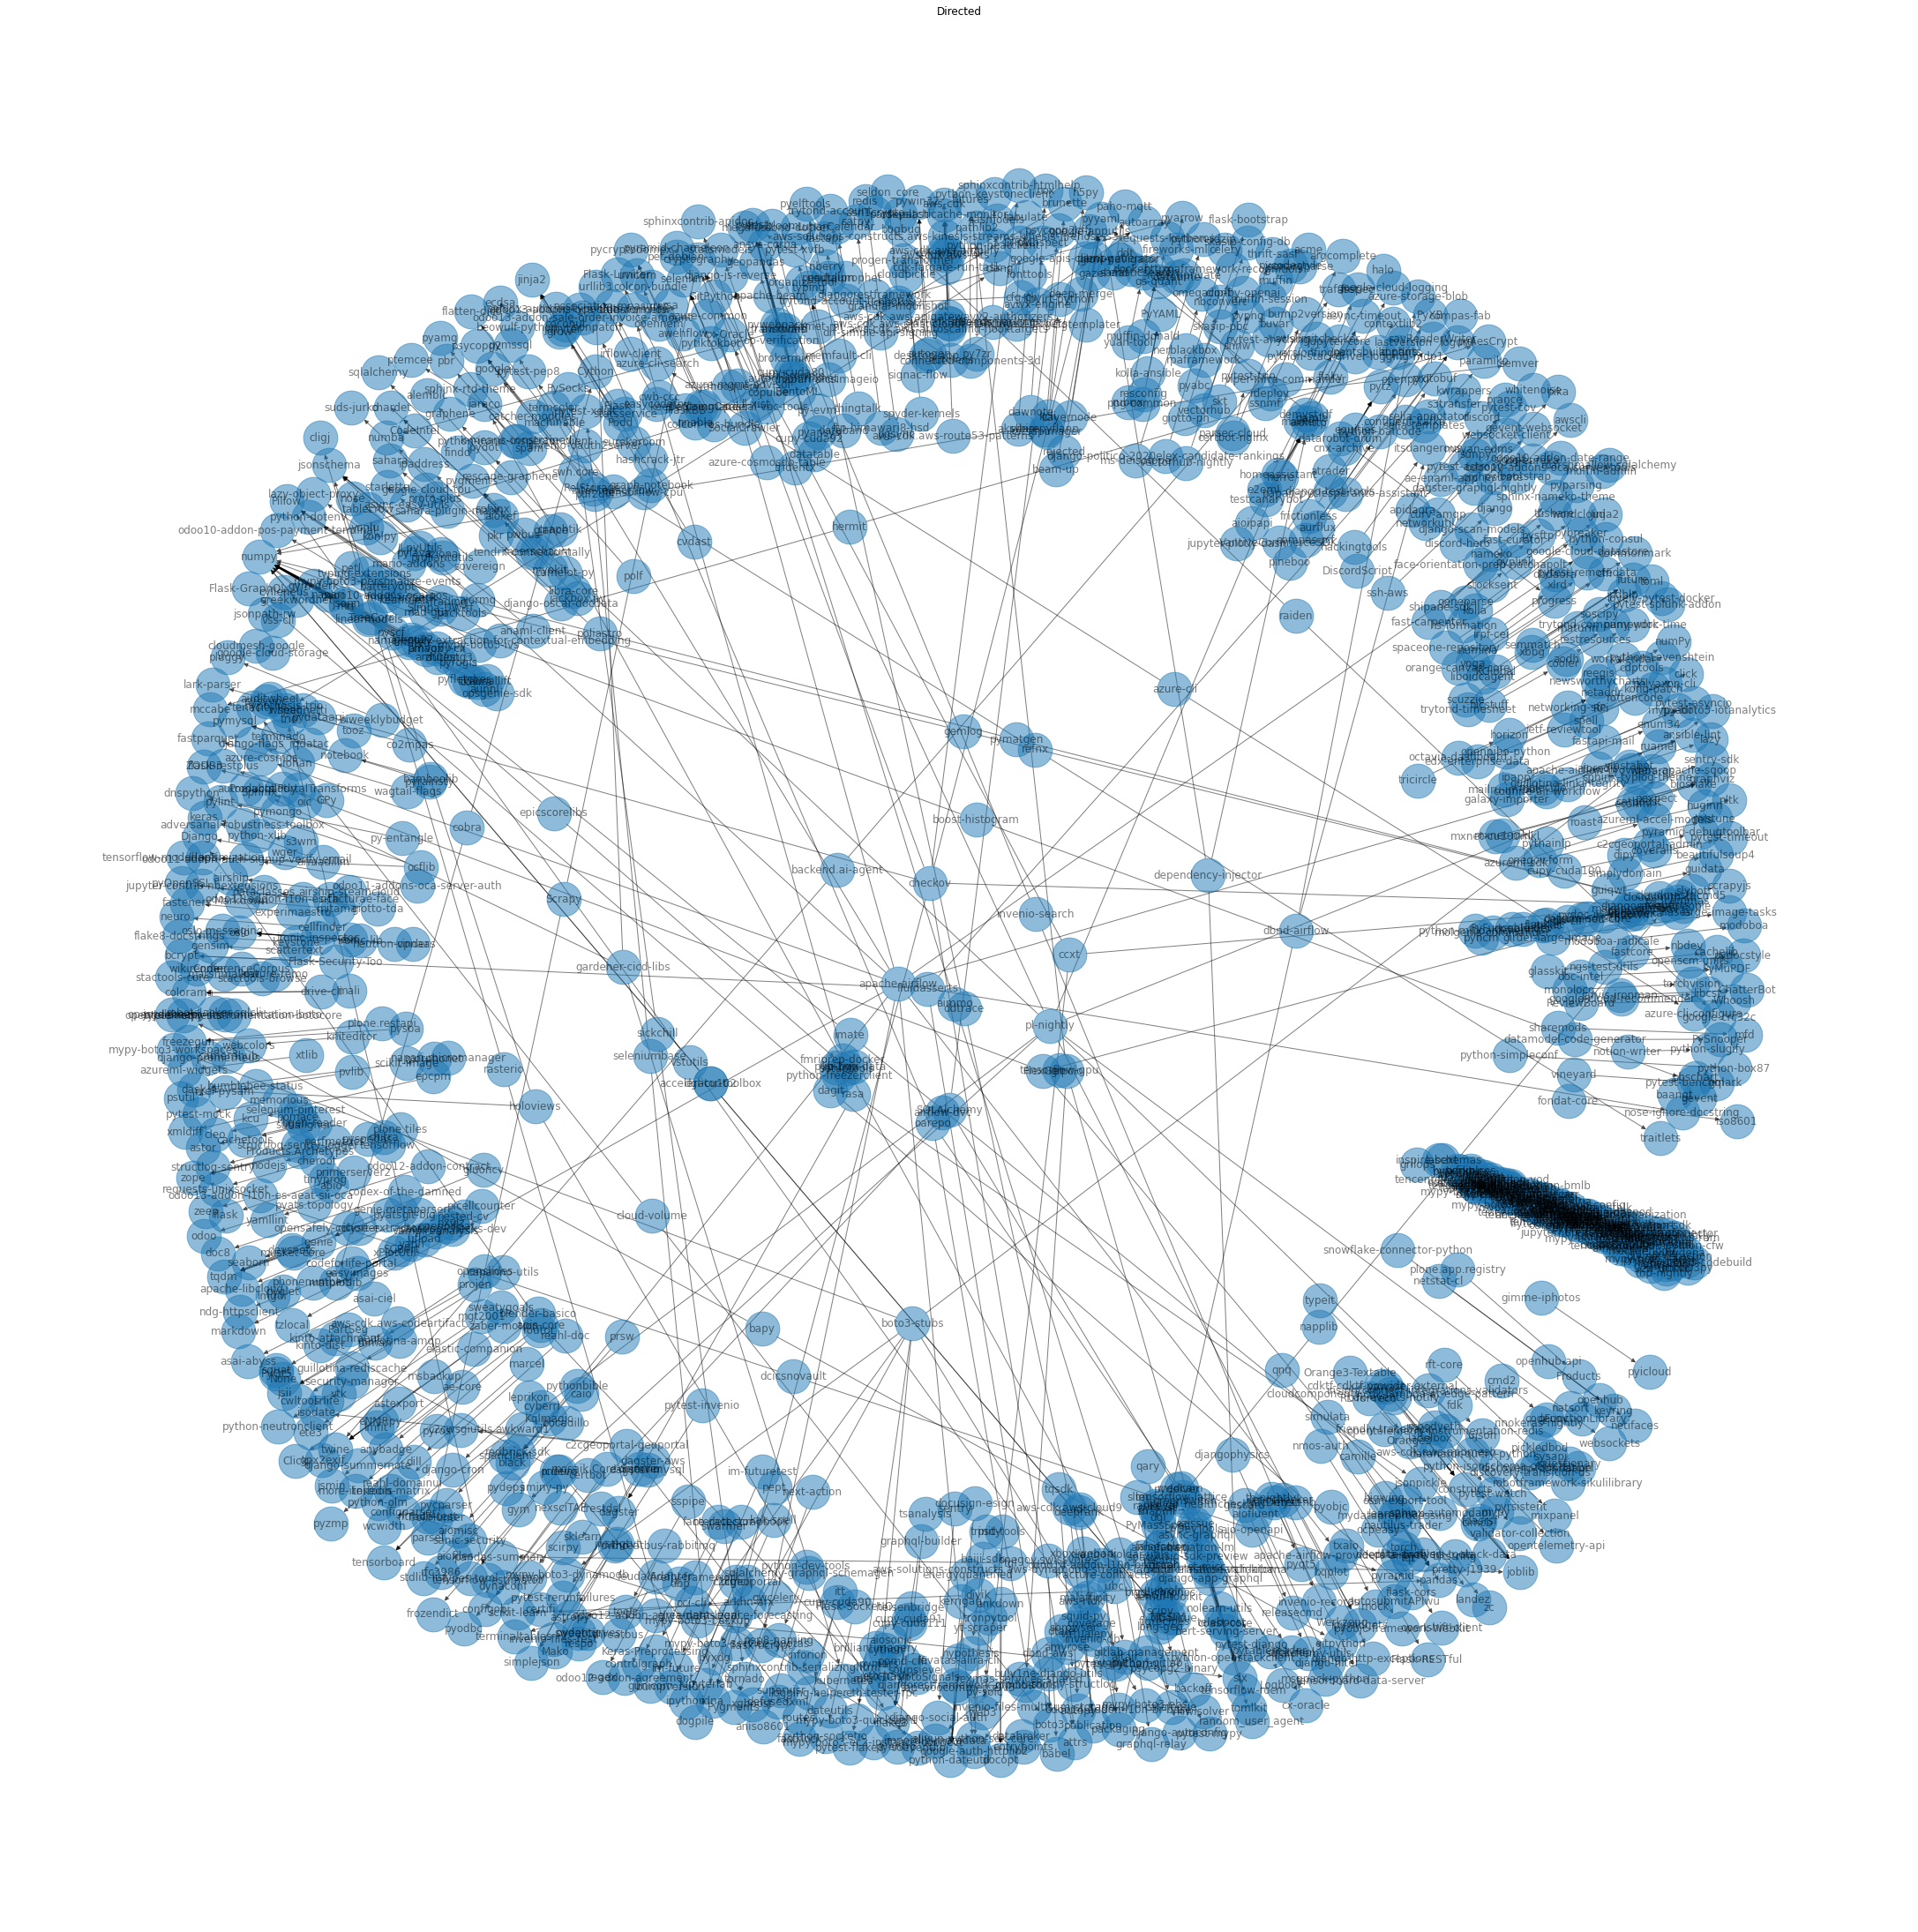

In [16]:
pos = nx.spring_layout(G, seed=42)  # Seed layout for reproducibility
plt.figure(figsize=(30,30)) 
#https://www.python-graph-gallery.com/323-directed-or-undirected-network
# Build your graph. Note that we use the DiGraph function to create the graph!
G_test=nx.from_pandas_edgelist(dep_df_sm, 'name', 'dependency_name', create_using=nx.DiGraph() )
# Make the graph
nx.draw(G_test, with_labels=True, node_size=1500, alpha=0.5, arrows=True)
plt.title("Directed")
plt.savefig('take1_1000sample_dep.png')
plt.show()